IA2023 - Self Organizing Maps (SOM) - miniSOM

En este notebook veremos las funciones básicas de miniSOM.
Versión adaptada de tutorial de:

https://github.com/JustGlowing (autor de miniSOM)

In [1]:
# SI estamos en Gcolab, instalamos miniSOM
#import sys
#sys.path.insert(0, '../')
#%load_ext autoreload

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  # Install Intrasom
  !pip install minisom

In [2]:
# Importamos librerías:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

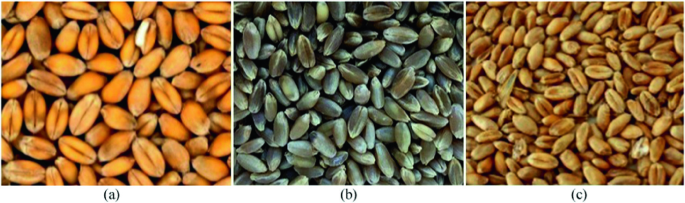

Probaremos aplicar SOM a un dataset de prueba llamado "seeds":

Son mediciones de propiedades geométricas de granos pertenecientes a tres variedades diferentes de trigo.
El grupo examinado esta formado por granos de tres variedades diferentes de trigo: Kama, Rosa y Canadiense, de 70 elementos cada uno, seleccionados al azar para el experimento. Se detectó una visualización de alta calidad de la estructura interna del núcleo mediante una técnica de rayos X suaves. No es destructivo y considerablemente más económico que otras técnicas de obtención de imágenes más sofisticadas, como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas de rayos X KODAK de 13x18 cm. Los estudios se llevaron a cabo utilizando granos de trigo cosechados en campos experimentales, explorados en el Instituto de Agrofísica de la Academia Polaca de Ciencias en Lublin.


A continuación cargamos el dataset de semillas:

In [3]:
columns=['area', 'perimetro', 'compacidad', 'largo_grano', 'ancho_grano',   #Compacidad = 4 pi Area/Perimetro^2
                   'coeficiente_asimetria', 'largo_surco_grano', 'target']
data = pd.read_csv("https://raw.githubusercontent.com/Szy-Young/K-means-Clustering/master/seeds_dataset.txt",
                    #'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    names=columns,
                   sep='\t+', engine='python')
target = data['target'].values
label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
dataconclase = data
data = data[data.columns[:-1]]


In [4]:
dataconclase.loc[dataconclase["target"]==1].describe() #por si queremos ver sólo los granos "Kama"

,area,perimetro,compacidad,largo_grano,ancho_grano,coeficiente_asimetria,largo_surco_grano,target
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214,1.0
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699,0.0
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000,1.0
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500,1.0
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000,1.0
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500,1.0
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000,1.0


In [5]:
data

,area,perimetro,compacidad,largo_grano,ancho_grano,coeficiente_asimetria,largo_surco_grano
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [6]:
data.describe()

,area,perimetro,compacidad,largo_grano,ancho_grano,coeficiente_asimetria,largo_surco_grano
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [7]:
# normalizamos los datos
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data

,area,perimetro,compacidad,largo_grano,ancho_grano,coeficiente_asimetria,largo_surco_grano
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


In [8]:
data.describe()

,area,perimetro,compacidad,largo_grano,ancho_grano,coeficiente_asimetria,largo_surco_grano
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-3.383537e-16,1.184238e-16,1.285744e-15,-2.097793e-15,-3.383537e-16,-3.383537e-16,-8.987520e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


Hasta ahora tenemos la variable "data", que está en formato pandas (tipo "excel"). Para usar miniSOM, debemos pasarla a formato numpy (tipo "numérico").

Para ello reemplazamos la variable data por sólo sus valores:

In [9]:
data = data.values

Anora entonces podemos inicializar y entrenar miniSOM:

In [10]:
# Inicialización:
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0, topology='rectangular')
som.pca_weights_init(data)

# Entrenamiento:
som.train(data, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5122938629333135


Para visualizar el resultado del entrenamiento podemos plotear el mapa de distancias (U-Matrix) utilizando pseudocolores, donde las neuronas de los mapas se muestran como un array de celdas y el color representa la distancia (de los pesos) respecto las neuronas vecinas. Por sobre el pseudocolor podemos añadir marcadores para representar los ítems mapeados en celdas específicas:

In [11]:
som.topographic_error(data)

0.10952380952380952

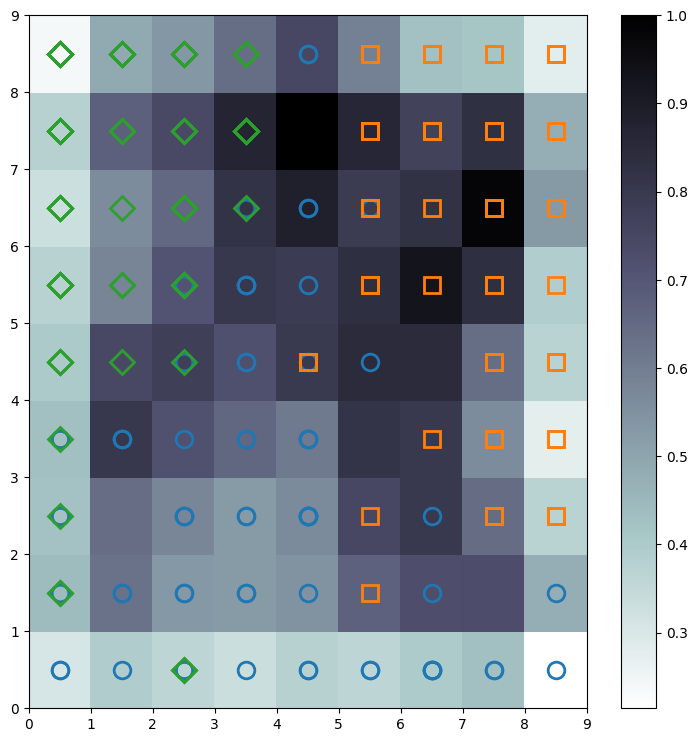

In [12]:

%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # Ploteando el mapa de distancias como "fondo"
plt.colorbar()

# Ploteamos la distribución de los granos en nuestro SOM
# Diferentes marcadores y colores para cada etiqueta

markers = ['o', #Círculo - grano "Kama"
           's', #Cuadrado - grano "Rosa"
           'D'] #Diamante - grano "Canadiense"
colors = ['C0', #Azul - grano "Kama"
          'C1', #Naranja - grano "Rosa"
          'C2'] #Verde - grano "Canadiense"

for cnt, xx in enumerate(data):
    w = som.winner(xx)  # Obtenemos la celda ganadora
    # Ubicamos el marcador en su celda ganadora
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

Para tener una idea de cómo las muestras se distribuyen dentro del mapa, un gráfico de distribución puede ser usado, donde cada punto representa las coordenadas de la neurona ganadora.

Añadimos un "ruido de desplazamiento" para evitar superposiciones de puntos dentro de la misma celda.

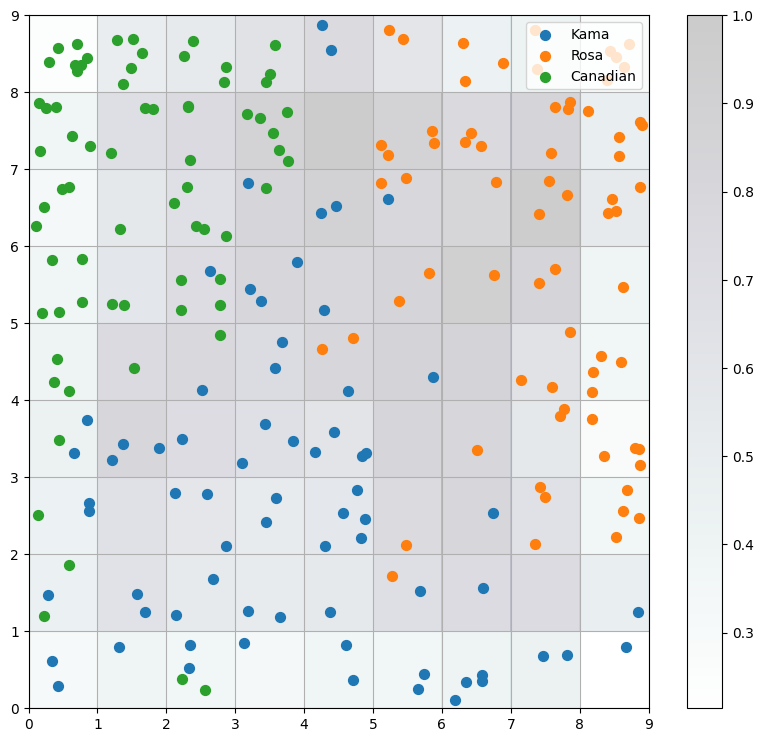

In [13]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

También podemos hacernos una idea de cuáles neuronas son las más activas creando otro ploteo de pseudocolor que refleje la frecuencia de activación:

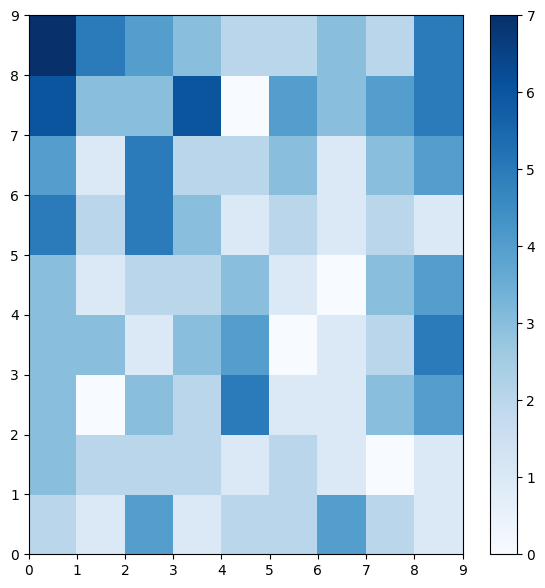

In [14]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()

Si bien los SOM son algoritmos no supervisados... nuestros datos están clasificados, por lo cual podemos visualizar la proporción de muestras según clase que caen en cada neurona.

Para ello usaremos un gráfico de tortas para cada neurona:

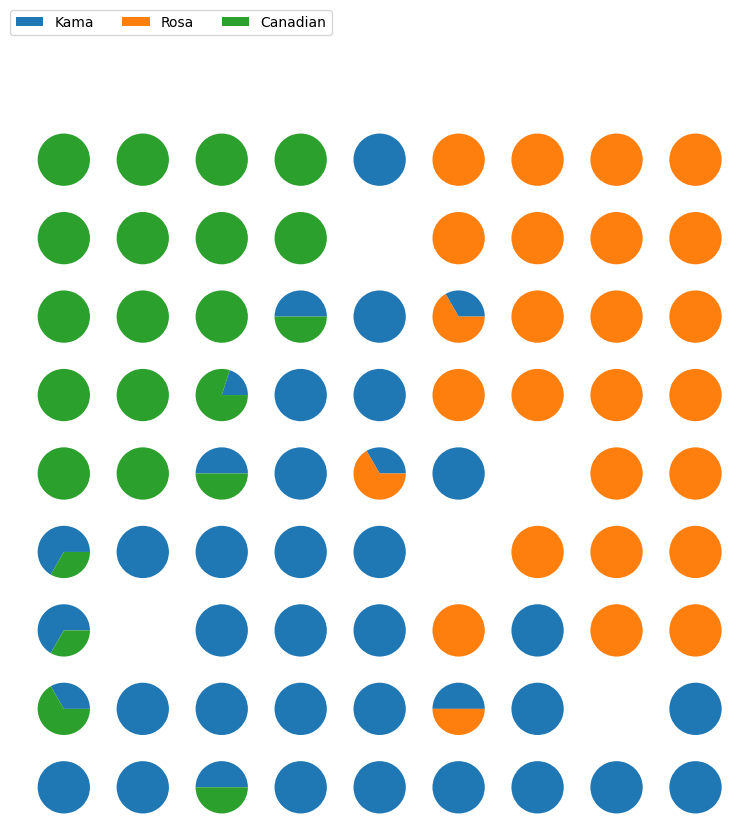

In [15]:
labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()

Si queremos ver cómo evoluciona el entrenamiento, podemos plotear los errores de cuantización y topográficos de nuestro SOM a cada paso del entrenamiento.

Esto puede servirnos para estimar cuántas iteraciones deberíamos correr (o si nuestro modelo es muy grande/chico respecto a nuestro conjunto de datos)

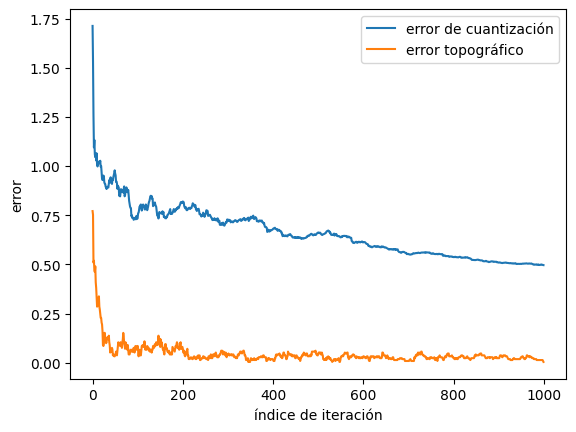

In [16]:
som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='error de cuantización')
plt.plot(np.arange(max_iter), t_error, label='error topográfico')
plt.ylabel('error')
plt.xlabel('índice de iteración')
plt.legend()
plt.show()

En el modelo anterior no inicializamos los pesos mediante PCA, entonces el error topgráfico comienza alto. Probemos de inicializarlos a ver cómo se comporta:

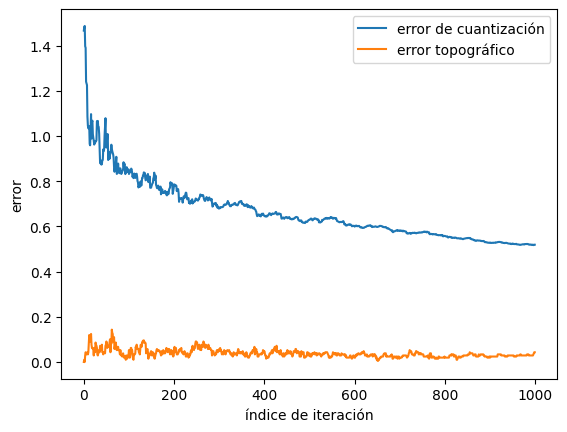

In [17]:
som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

som.pca_weights_init(data)
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='error de cuantización')
plt.plot(np.arange(max_iter), t_error, label='error topográfico')
plt.ylabel('error')
plt.xlabel('índice de iteración')
plt.legend()
plt.show()